# Uniform Flow and Well


The worksheet addresses the superposition of uniform and radial steady-state groundwater flow <br>
in a homogeneous, confined aquifer of uniform thickness without recharge. <br>
The radial flow component may represent an extraction or injection well. <br>

Three travel time values representing isochrones can be selected by the user. <br>

input parameters		    |   units	|   remarks
:---------------------------|:----------|:--------------------------------------
hydraulic conductivity		|   m/s	    |   enter positive number
effective porosity		    |   -	    |   enter number between 0 and 1
thickness		            |   mm/a	|   enter positive number
uniform velocity		    |   m/d	    |   enter number different from zero$*$
pumping rate		        |   m³/d	|   enter number different from zero$**$
travel time		            |   d	    |   enter positive number


$*$ Positive or negative numbers correspond to uniform flow in parallel with or antiparallel to the x-axis, resp. <br>
$**$ Positive or negative numbers correspond to water extraction or injection, resp.



This tool can also be downloaded and run locally. For that download the **uniform_flow_and_well.ipynb** file from the book GitHub site, and execute the process in any editor (e.g., JUPYTER notebook, JUPYTER lab) that is able to read and execute this file-type.

The codes are licensed under CC by 4.0 [(use anyways, but acknowledge the original work)](https://creativecommons.org/licenses/by/4.0/deed.en)

In [14]:
import streamlit as st
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### Streamline Isoline Calculation 

In [15]:
def case_well(X1_para,Y1_para,Q_para1,X2_para,Y2_para,Q_para2,K_para,Por_para,Qx_para ):


    H = 9.                                     # thickness [L]
    h0 = 9.5                                    # reference piezometric head [L] 
    K = K_para * 5.e-5                          # hydraulic conductivity [L/T] 
    por = Por_para                              # porosity []   old 0.25
    Qx0 = Qx_para * 1.e-10                      # baseflow in x-direction [L^2/T] was 1.e-6 before
    #Qy0 = Qy_para * 1.e-10                                    # baseflow in y-direction [L^2/T]
    Qy0 = 0
    # Wells
    xwell = np.array([X1_para, X2_para])        # x-coordinates well position [L] [99, 145]
    ywell = np.array([Y1_para, Y2_para])        # y-coordinates well position [L] [50, 78
    Qwell = np.array([Q_para1 * 1.e-4, Q_para2 * 1.e-4])   # pumping / recharge rates [L^3/T]
    R = [0.3, 0.2]                              # well radius [L]
    # Mesh
    xmin = 0           # minimum x-position of mesh [L]
    xmax = 200         # maximum x-position of mesh [L]
    ymin = 0           # minimum y-position of mesh [L]
    ymax = 200         # maximum y-position of mesh [L]

    
    # Reference point position in mesh
    iref = 1
    jref = 1

    # Graphical output options
    gsurfh = 1         # piezometric head surface plot
    gcontf = 10        # no. filled contour lines (=0: none)
    gquiv = 0          # arrow field plot
    gflowp_fit = 0     # flowpaths forward in time
    gflowp_bit = 0     # no. flowpaths backward in time (=0: none)
    gflowp_dot = 1     # flowpaths with dots indicating speed
    gstream = 10        # streamfunction plot            10



    #----------------------------------------execution-------------------------------
    xvec = np.linspace(xmin, xmax, 100)
    yvec = np.linspace(ymin, ymax, 100)
    [x, y] = np.meshgrid(xvec, yvec)                        # mesh
    phi = -Qx0 * x - Qy0 * y                                # baseflow potential
    psi = -Qx0 * y + Qy0 * x
    for i in range(0, xwell.size):                          # old version was: for i = 1:size(xwell,2)
        #r = np.sqrt((x - xwell[i]) * (x - xwell[i]) + (y - ywell[i]) * (y - ywell[i]))
        r = np.sqrt((x - xwell[i])**2 + (y - ywell[i])**2)
        phi = phi + (Qwell[i] / (2 * np.pi)) * np.log(r)    # potential
        psi = psi + (Qwell[i]/ (2 * np.pi)) * np.arctan2((y - ywell[i]), (x - xwell[i]))
    if h0 > H:
        phi0 = -phi[iref, jref] + K * H * h0 - 0.5 * K * H * H 
    else:
        phi0 = -phi[iref, jref] + 0.5 * K * h0 * h0          # reference potential                                                 
    hc = 0.5 * H + (1 / K / H) * (phi + phi0)                     # head confined
    hu = np.sqrt((2 / K) * (phi + phi0))                      # head unconfined
    phicrit = phi0 + 0.5 * K * H * H                        # transition confined / unconfined
    confined = (phi >= phicrit)                         # confined / unconfined indicator
    h = confined * hc+ ~confined * hu                    # head

    [u,v] = np.gradient(-phi)                           # discharge vector  
    Hh = confined * H + ~confined * h                   # aquifer depth  
    u = u / Hh / (xvec[2] - xvec[1]) / por
    v = v / Hh / (yvec[2] - yvec[1]) / por
    #--------------------------------------graphical output--------------------
    if gsurfh: 
        #plt.figure()
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        surf = ax.plot_surface(x, y, h,cmap=cm.coolwarm,linewidth=0,antialiased=True)                         # surface 
        #plt.gca().zaxis.set_major_formatter(StrMethodFormatter('{x:,.4f}'))
        ax.set_xlabel('x [m]')
        ax.set_ylabel('y [m]')

        ax.set_zlabel('drawdown [m]')
        fig.colorbar(surf, shrink=.8, ax=[ax], location = "left") # ax=[ax], location='left' for left side

        #fig.colorbar(surf, shrink=0.5, aspect=10)
    if gcontf or gquiv or gflowp_fit or gflowp_bit or gflowp_dot or gstream:
        fig2, ax = plt.subplots()

        contour = plt.contour(x, y, h, gcontf, cmap=cm.Blues)
        contour2 = plt.contour(x, y, psi, gstream, colors=['#808080', '#808080', '#808080'], extend='both')

        ax.set_xlabel('x [m]')
        ax.set_ylabel('y [m]')

        contour.cmap.set_over('#808080')
        contour.cmap.set_under('blue')
        contour.changed()

        # Manually add color patches to the legend
        labels = ['Streamline', 'Potentialline']
        handles = [
            plt.Line2D([0], [0], color='#808080', lw=2),
            plt.Line2D([0], [0], color='blue', lw=2),
        ]

        plt.legend(handles, labels, loc='upper left')



    if gquiv:
        plt.quiver(x,y,v,u)                          # arrow field // quiver(x,y,u,v,'y') 
    if gflowp_fit:                                      # flowpaths 
        xstart = []
        ystart = []
        for i in range(100):
            if v[1,i] > 0:
                xstart = [xstart, xvec[i]]
                ystart = [ystart, yvec[1]]
            if v[99,i] < 0:
                xstart = [xstart, xvec[i]]
                ystart = [ystart, yvec[99]]
            if u[i,1] > 0:
                xstart = [xstart, xvec[1]]
                ystart = [ystart, yvec[i]]
            if u[i,99] < 0:
                xstart = [xstart, xvec[99]]
                ystart = [ystart, yvec[i]]
    
        h = plt.streamplot(x,y,u,v,)#,xstart,ystart)
        plt.streamplot(x,y,u,v,color='b')#,xstart,ystart)
  
    if gflowp_bit:          
        for j in range(0, Qwell.size):
            if Qwell[j]>0:           # only for pumping wells
                xstart = xwell[j] + R[j]*np.cos(2*np.pi*np.array([1,1,gflowp_bit])/gflowp_bit) 
                ystart = ywell[j] + R[j]*np.sin(2*np.pi*np.array([1,1,gflowp_bit])/gflowp_bit)
                seed_points = np.array([xstart,ystart])

                h = plt.streamplot(x,y,-u,-v,start_points=seed_points.T)


    
    
    plt.show()
#Testing the code
#case_well(X1_para=15,Y1_para=25,Q_para1=2,X2_para=30,Y2_para=40,Q_para2=1,K_para=2.1,Por_para=0.6,Qx_para=2 )

### Enter Data using the Widgets below 

In [16]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Function to create and display widgets based on the number of wells selected
def create_widgets(num_wells):
    #print(num_wells)
    # Define the widgets
    style = {'description_width': 'initial'}
    if num_wells==2 : 
        X1_para = widgets.FloatText(value=75, description='X Position Well 1',style=style)
        Y1_para = widgets.FloatText(value=100, description='Y Position Well 1',style=style)
        Q_para1 = widgets.FloatText(value=1, description='Pumping Rate Well 1',style=style)
        X2_para = widgets.FloatText(value=150, description='X Position Well 2',style=style)
        Y2_para = widgets.FloatText(value=100, description='Y Position Well 2',style=style)
        Q_para2 = widgets.FloatText(value=1, description='Pumping Rate Well 2',style=style)
        K_para = widgets.FloatText(value=6.3, description='Hydraulic Conductivity (K)',style=style)
        Por_para = widgets.FloatText(value=0.6, description='Porosity (ne)',style=style)
        Qx_para = widgets.FloatText(value=1, description='Baseflow Discharge (Qx)',style=style)
        
        # Function to be called on widget change
        def on_widget_change(change):
            clear_output(wait=True)
            hbox1 = widgets.HBox([X1_para, Y1_para, Q_para1])
            hbox2 = widgets.HBox([X2_para, Y2_para, Q_para2])
            hbox3 = widgets.HBox([K_para, Por_para, Qx_para])
            vbox = widgets.VBox([hbox1, hbox2, hbox3])
            display(vbox)
            case_well(
                X1_para.value, Y1_para.value, Q_para1.value, 
                X2_para.value, Y2_para.value, Q_para2.value, 
                K_para.value, Por_para.value, Qx_para.value
            )

        # Observe changes in the widgets
        X1_para.observe(on_widget_change, 'value')
        Y1_para.observe(on_widget_change, 'value')
        Q_para1.observe(on_widget_change, 'value')
        X2_para.observe(on_widget_change, 'value')
        Y2_para.observe(on_widget_change, 'value')
        Q_para2.observe(on_widget_change, 'value')
        K_para.observe(on_widget_change, 'value')
        Por_para.observe(on_widget_change, 'value')
        Qx_para.observe(on_widget_change, 'value')

        # Initial display
        on_widget_change(None)
    if num_wells==1 : 
        X1_para = widgets.FloatText(value=75, description='X Position Well 1',style=style)
        Y1_para = widgets.FloatText(value=100,  description='Y Position well 1',style=style)
        Q_para1 = widgets.FloatText(value=1,  description='Pumping Rate Well 1',style=style)
        #X2_para = widgets.FloatText(value=150, description='X-well 2')
        #Y2_para = widgets.FloatText(value=100, description='Y-well 2')
        #Q_para2 = widgets.FloatText(value=1, description='Pumping 2')
        K_para = widgets.FloatText(value=6.3,description='Hydraulic Conductivity (K)',style=style)
        Por_para = widgets.FloatText(value=0.6, description='Porosity (ne)',style=style)
        Qx_para = widgets.FloatText(value=1, description='Baseflow Discharge (Qx)',style=style)
        
        # Function to be called on widget change
        def on_widget_change(change):
            clear_output(wait=True)
            hbox1 = widgets.HBox([X1_para, Y1_para, Q_para1])
            #hbox2 = widgets.HBox([X2_para, Y2_para, Q_para2])
            hbox3 = widgets.HBox([K_para, Por_para, Qx_para])
            vbox = widgets.VBox([hbox1, hbox3])
            X2_para=0
            Y2_para=0
            Q_para2=0
            display(vbox)
            case_well(
                X1_para.value, Y1_para.value, Q_para1.value, 
                X2_para, Y2_para, Q_para2, 
                K_para.value, Por_para.value, Qx_para.value
            )

        # Observe changes in the widgets
        X1_para.observe(on_widget_change, 'value')
        Y1_para.observe(on_widget_change, 'value')
        Q_para1.observe(on_widget_change, 'value')
        #X2_para.observe(on_widget_change, 'value')
        #Y2_para.observe(on_widget_change, 'value')
        #Q_para2.observe(on_widget_change, 'value')
        K_para.observe(on_widget_change, 'value')
        Por_para.observe(on_widget_change, 'value')
        Qx_para.observe(on_widget_change, 'value')

        # Initial display
        on_widget_change(None)

# Dropdown to select the number of wells
num_wells_dropdown = widgets.Dropdown(options=['Select',1, 2], description='Number of Wells')

# Function to be called on dropdown change
def on_dropdown_change(change):
    clear_output(wait=True)
    display(num_wells_dropdown)
    create_widgets(change.new)

# Observe changes in the dropdown
num_wells_dropdown.observe(on_dropdown_change, 'value')

# Display the dropdown
display(num_wells_dropdown)

Dropdown(description='Number of Wells', options=('Select', 1, 2), value='Select')

## Isochrones and Capture Zones 


The following script is based on the publication On Using Simple Time-of-Travel Capture Zone Delineation Methods by Admir Ceric and Henk Haitjema
This can be used to plot the capture zone of a well, given he time of travel. 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_Lu(T):
    return T + np.log(T + np.e)

def calculate_y(T, x):
    Lu = calculate_Lu(T)
    return np.arctan(x / Lu)

def calculate_radius(T):
    return 1.161 * np.log(0.39 + T)

def calculate_eccentricity(T):
    return 0.00278 + (0.652 * T)

def calculate_radius_regular(T):
    return 1.6324 * np.sqrt(T)


def plotter(T_values) :
        
    # Define the range of T values
    #T_values = [0.05, 0.08, 0.1, 0.6, 0.9, 1.2, 3, 6]

    # Define a color palette for the lines
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'lime']

    # Loop through T values and plot accordingly
    for i, T in enumerate(T_values):
        color = colors[i % len(colors)]  # Cycle through colors if more than 10 T values
        
        if T <= 0.1:
            R = calculate_radius_regular(T)
            theta = np.linspace(0, 2*np.pi, 100)
            x = R * np.cos(theta)
            y = R * np.sin(theta)
            
            plt.plot(x, y, label=f'T={"{:.2f}".format(T)}', color=color)
        elif T <= 1:
            R = calculate_radius(T)
            d = calculate_eccentricity(T)
            
            theta = np.linspace(0, 2*np.pi, 100)
            x = R * np.cos(theta) + d
            y = R * np.sin(theta)
            x = -x
            
            plt.plot(x, y, label=f'T={"{:.2f}".format(T)}', color=color)
            #plt.scatter(0, 0, color='red', label='Upgradient Shift', marker='x')
        else:
            Lu = calculate_Lu(T)
        
            x = np.linspace(0, 2*Lu, 100)  # x~ from 0 to 2Lu
            y = np.linspace(0, 1, 100)
            x = -x
            y = calculate_y(T, x-1)
            
            plt.plot(x, y, label=f'T={"{:.2f}".format(T)}', color=color)
            plt.plot(x, -y, color=color)

    # Add legend and labels
    plt.scatter(0, 0, color='red', label='Well', marker='x')
    plt.legend()
    plt.xlabel('X~')
    plt.ylabel('Y~')

    # Display all the plots together at the end
    plt.show()


### Enter Data using Widgets below 

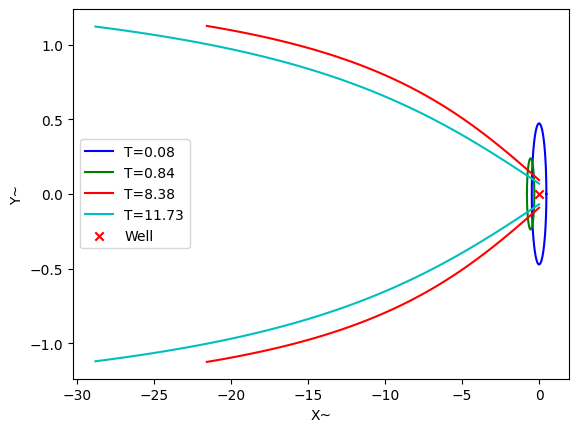

In [18]:
# Create nine FloatText widgets
import math
import ipywidgets as widgets
from IPython.display import display, clear_output

def calculate_tdash(Qo,Q,H,n,T1,T2,T3,T4):
    T=[T1,T2,T3,T4]
    #print(T)
    Tdash=[]
    for t in T :
        Tdash.append((2 * math.pi * Qo**2 * t) / (n * H * Q))
    #print(Tdash)
    return(Tdash)






style = {'description_width': 'initial'}
widget1 = widgets.FloatText(value=2, description='Ambient Flow Qo [L2/T]',style=style)
widget2 = widgets.FloatText(value=3, description='Well Discharge Q [L3/T]',style=style)
widget3 = widgets.FloatText(value=20, description='Thickness Aquifier H [L]',style=style)
widget4 = widgets.FloatText(value=0.25, description='effective porosity',style=style)

widget5 = widgets.FloatText(value=0.05, description='time-of-travel [T]',style=style)
widget6 = widgets.FloatText(value=0.5, description='time-of-travel [T]',style=style)
widget7 = widgets.FloatText(value=5, description='time-of-travel [T]',style=style)
widget8 = widgets.FloatText(value=7, description='time-of-travel [T]',style=style)


# Function to be called on widget change
def on_widget_change(change):
    Tdash=[]
    clear_output(wait=True)
    # Create three HBox layouts to contain the widgets
    hbox1 = widgets.HBox([widget1, widget2])
    hbox2 = widgets.HBox([widget3, widget4])
    hbox3 = widgets.HBox([widget5, widget6, widget7,widget8])

    # Create a VBox layout to contain the three HBox layouts
    vbox = widgets.VBox([hbox1, hbox2, hbox3])

    # Display the VBox layout
    display(vbox)
    Tdash=calculate_tdash(widget1.value,widget2.value,widget3.value,widget4.value,widget5.value,widget6.value,widget7.value,widget8.value)
    plotter(Tdash)




widget1.observe(on_widget_change, 'value')
widget2.observe(on_widget_change, 'value')
widget3.observe(on_widget_change, 'value')
widget4.observe(on_widget_change, 'value')
widget5.observe(on_widget_change, 'value')
widget6.observe(on_widget_change, 'value')
widget7.observe(on_widget_change, 'value')
widget8.observe(on_widget_change, 'value')
on_widget_change(None)
